Found 76 images belonging to 2 classes.


Found 42 images belonging to 2 classes.
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 351ms/step - accuracy: 0.4916 - loss: 0.7331 - val_accuracy: 0.6905 - val_loss: 0.6538
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.6287 - loss: 0.6562 - val_accuracy: 0.6905 - val_loss: 0.6506
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.6793 - loss: 0.6486 - val_accuracy: 0.6905 - val_loss: 0.6397
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.6779 - loss: 0.6443 - val_accuracy: 0.6905 - val_loss: 0.6392
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.6754 - loss: 0.6252 - val_accuracy: 0.6905 - val_loss: 0.6258
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.6597 - loss: 0.6563 - val_accuracy: 0.6905 - val_loss: 0.6297
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.6949 - loss: 0.5794 - val_accuracy: 0.6905 - val_loss: 0.6252
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.6571 - loss: 0

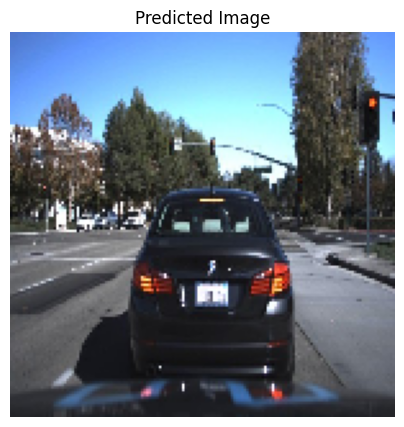

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


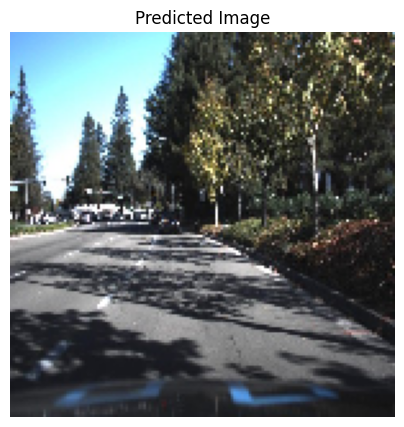

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Define data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data should only be rescaled, not augmented
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the dataset
train_generator = train_datagen.flow_from_directory(
    r'D:\vs\FDL\assignment\images\train',  # this path for train
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    r'D:\vs\FDL\assignment\images\test',  # this path for test
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Build the CNN model
model = Sequential([
    Input(shape=(150, 150, 3)),  
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Helps reduce overfitting

    Dense(2, activation='softmax')  # Adjust to 2 classes
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Define EarlyStopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=None,  # Automatically calculate the steps
    epochs=10,
    validation_data=validation_generator,
    validation_steps=None,  # Automatically calculate the validation steps
    callbacks=[early_stopping]
)


# Save the trained model
model.save('self_model.keras')

# Load the pre-trained model
model = load_model('self_model.keras')

# List of image paths for prediction
image_paths = [
    r'D:\vs\FDL\assignment\images\test\car\1479500095083779258.jpg',
    r'D:\vs\FDL\assignment\images\test\object\1479500128083571738.jpg',  # Add your second image path here
]

# Loop through each image path, process the image, and make predictions
for image_path in image_paths:
    # Load and preprocess the image
    image = load_img(image_path, target_size=(150, 150))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array /= 255.0  # Apply the same scaling as training data

    # Get predictions
    predictions = model.predict(image_array)
    
    # Assuming the model outputs probabilities for different classes
    predicted_class = np.argmax(predictions[0])
    # Plot the original image with its prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title('Predicted Image')
    plt.axis('off')
    plt.show()
